# Airbnb Price Prediction


### Project Flow

1. Project Overview
2. Dataset
3. Goal
4. Importing required libraries and Dataset
5. Exploratory Data Analysis
6. Data Processing
7. Prediction Models
    - Linear Regression
    - Random Forest Regression
    - Gradient Boosting Regression
    - Dense Neural Networks
    - Model Comparison
8. tf-idf Transformer
9. Stacked Regression
10. Validation Process
11. Conclusion

********************************

### Airbnb Price Prediction
### Project Overview

Determining the right price for a rental property on Airbnb is a difficult yet crucial decision for hosts, as it directly impacts demand and occupancy. At the same time, guests often struggle to assess whether the listed price is reasonable due to limited knowledge about market dynamics. This project focuses on building a robust price prediction system leveraging machine learning, deep learning, and natural language processing (NLP) techniques. The model incorporates property features, host details, and customer reviews as inputs, and explores a variety of approaches including linear regression, tree-based algorithms, support vector regression (SVR), K-means clustering (KMC), and neural networks (NNs) to generate accurate price estimates.

 ### Dataset

The dataset has been sourced from Kaggle: Airbnb Price Prediction Dataset

### Importing required libraries and Dataset

In [1]:
import os
import re
import nltk
import string
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import ipywidgets as widgets
from plotly.offline import init_notebook_mode
from ipywidgets import interact, interactive, fixed, interact_manual
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from scipy.stats import shapiro, anderson
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

pd.set_option('display.max_columns', None)

In [2]:
path = kagglehub.dataset_download("stevezhenghp/airbnb-price-prediction")

print("Path to dataset files:", path)

# Build full path to train.csv inside the downloaded folder
train_file = os.path.join(path, "train.csv")

# Load dataset
data = pd.read_csv(train_file)
print(data.head())

Path to dataset files: C:\Users\rocks\.cache\kagglehub\datasets\stevezhenghp\airbnb-price-prediction\versions\1
         id  log_price property_type        room_type  \
0   6901257   5.010635     Apartment  Entire home/apt   
1   6304928   5.129899     Apartment  Entire home/apt   
2   7919400   4.976734     Apartment  Entire home/apt   
3  13418779   6.620073         House  Entire home/apt   
4   3808709   4.744932     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {"Wireless Internet","Air conditioning",Kitche...             3        1.0   
1  {"Wireless Internet","Air conditioning",Kitche...             7        1.0   
2  {TV,"Cable TV","Wireless Internet","Air condit...             5        1.0   
3  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
4  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   

   bed_type cancellation_policy  cleaning_fee city  \
0  R

### Spliting the Dataset 
* Split the dataset into 75:25 ratio
* Name the training set as x_train and y_train.
* Name the testing set as x_test and y_test.
* Using the random state here as, 101

In [3]:
df, validation_df  = train_test_split(data,
                                test_size=0.25,
                                random_state = 101)

In [4]:
df_train, df_test  = train_test_split(df,
                                test_size=0.25,
                                random_state = 101)

## Exploratory Data Analysis - EDA
Sometimes even the things we see with our naked eyes is not the “naked” truth. It needs time,conviction and certainty to get behind the truth. EDA — Exploratory Data Analysis - does this for Machine Learning enthusiast. It is a way of visualizing, summarizing and interpreting the information that is hidden in rows and column format. EDA is one of the crucial step in data science that allows us to achieve certain insights and statistical measure that is essential for the business continuity, stockholders and data scientists. It performs to define and refine our important features variable selection, that will be used in our model.

In [5]:
df_train.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,4.168700e+04,41687.000000,41687.000000,41571.000000,41687.000000,41687.000000,41687.000000,32248.000000,41644.000000,41620.000000
mean,1.126008e+07,4.781785,3.143642,1.232554,38.462137,-92.280070,20.812963,94.114953,1.264792,1.706007
std,6.083368e+06,0.717077,2.134425,0.574109,3.078110,21.685129,37.785910,7.741383,0.847086,1.242858
min,3.440000e+02,0.000000,1.000000,0.000000,33.340916,-122.511500,0.000000,20.000000,0.000000,1.000000
25%,6.268097e+06,4.317488,2.000000,1.000000,34.129931,-118.341316,1.000000,92.000000,1.000000,1.000000
50%,1.223036e+07,4.700480,2.000000,1.000000,40.664508,-76.992899,6.000000,96.000000,1.000000,1.000000
75%,1.641251e+07,5.220356,4.000000,1.000000,40.746488,-73.954371,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,530.000000,100.000000,10.000000,16.000000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41687 entries, 17236 to 68913
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      41687 non-null  int64  
 1   log_price               41687 non-null  float64
 2   property_type           41687 non-null  object 
 3   room_type               41687 non-null  object 
 4   amenities               41687 non-null  object 
 5   accommodates            41687 non-null  int64  
 6   bathrooms               41571 non-null  float64
 7   bed_type                41687 non-null  object 
 8   cancellation_policy     41687 non-null  object 
 9   cleaning_fee            41687 non-null  bool   
 10  city                    41687 non-null  object 
 11  description             41687 non-null  object 
 12  first_review            32697 non-null  object 
 13  host_has_profile_pic    41573 non-null  object 
 14  host_identity_verified  41573 non-null 

**Price Distribution Converted to z - Plotting**

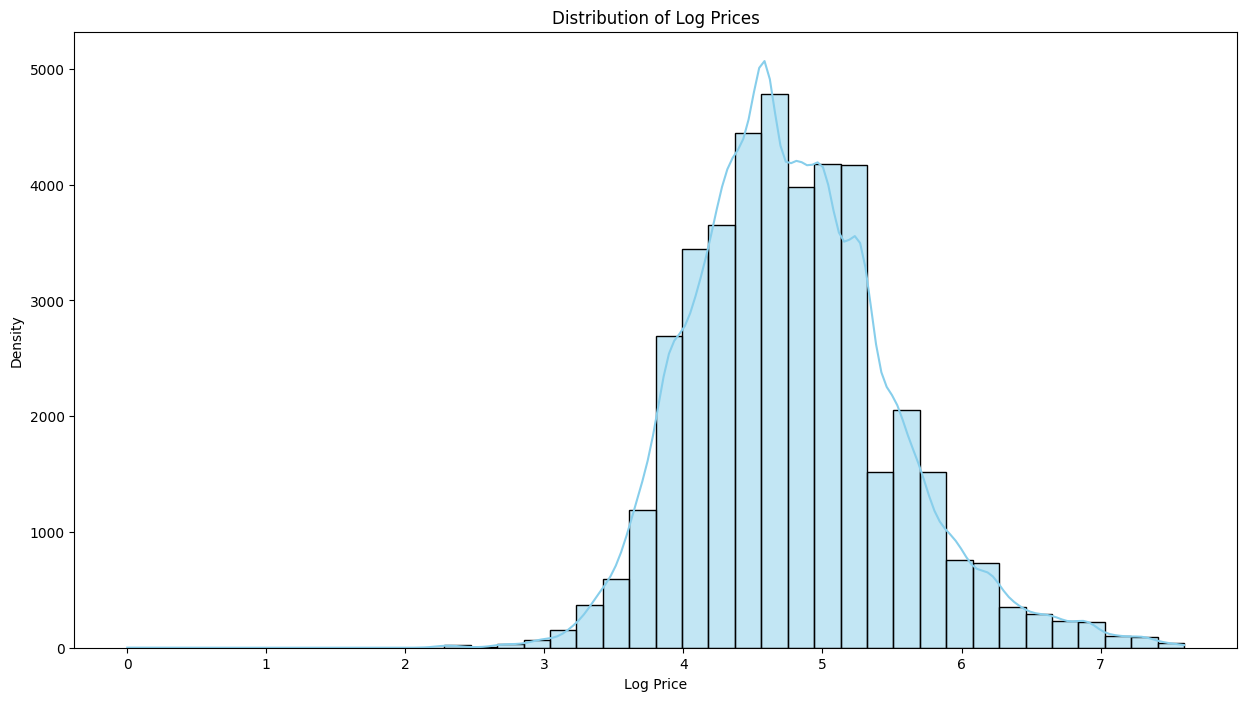

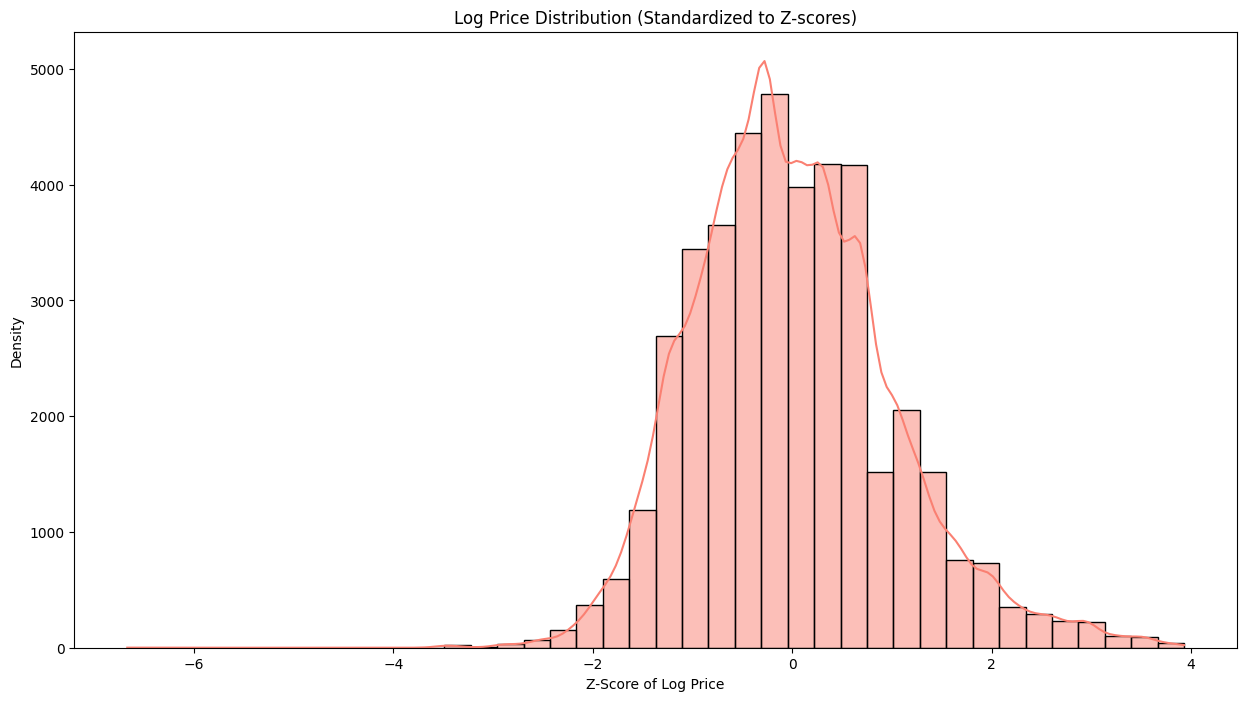

In [7]:
# Original price distribution
plt.figure(figsize=(15, 8))
sns.histplot(df_train['log_price'], kde=True, bins=40, color='skyblue')
plt.title('Distribution of Log Prices')
plt.xlabel('Log Price')
plt.ylabel('Density')
plt.show()

# Price distribution normalized to z-scores
z_scores = (df_train['log_price'] - df_train['log_price'].mean()) / df_train['log_price'].std()

plt.figure(figsize=(15, 8))
sns.histplot(z_scores, kde=True, bins=40, color='salmon')
plt.title('Log Price Distribution (Standardized to Z-scores)')
plt.xlabel('Z-Score of Log Price')
plt.ylabel('Density')
plt.show()

**Log price**

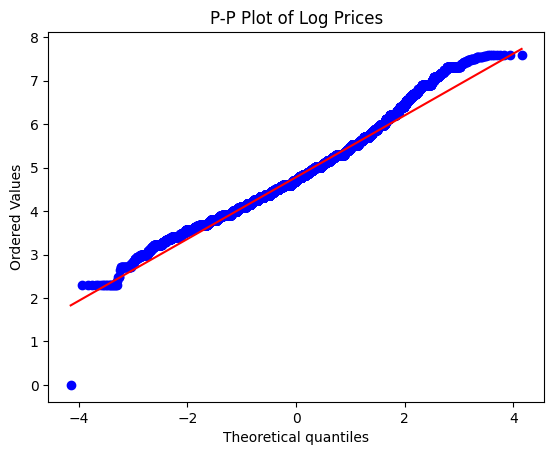

Shapiro-Wilk Test Statistic=0.9835, p-value=0.0000
Anderson-Darling Statistic=145.1963


D:\ML-ProjectKart-main\ML-ProjectKart-main\DAY 1\Airbnb Price Prediction\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 41687.



In [8]:
# Generate P-P plot for log_price
stats.probplot(df_train['log_price'], dist="norm", plot=plt)
plt.title('P-P Plot of Log Prices')
plt.show()


# Shapiro-Wilk test
stat, p = shapiro(df_train['log_price'])
print(f"Shapiro-Wilk Test Statistic={stat:.4f}, p-value={p:.4f}")

# Anderson-Darling test
result = anderson(df_train['log_price'])
print(f"Anderson-Darling Statistic={result.statistic:.4f}")

In [9]:
df_train[df_train['bedrooms'] == 0].head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
34202,6292490,6.214608,Loft,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",""Wheel...",16,1.0,Real Bed,strict,True,LA,"The studio features 35' ceilings, 3 skylights,...",2016-07-24,t,t,95%,2016-05-24,t,2017-04-09,34.069558,-118.227982,"Event Space w/ FREE Parking, No Noise Restrict...",NaN,28,93.0,https://a0.muscache.com/im/pictures/9e64020e-2...,90012,0.0,1.0
2941,9158651,4.820282,Loft,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",3,1.0,Real Bed,strict,True,LA,Close to LA Live and numerous Downtown enterta...,2016-10-30,t,t,100%,2014-06-16,t,2017-04-18,34.044590,-118.254967,Downtown Luxury Loft in Historic Building,Downtown,27,97.0,https://a0.muscache.com/im/pictures/dbb37a1c-c...,90014,0.0,1.0
33759,17367369,4.553877,Apartment,Entire home/apt,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,strict,False,DC,My peaceful abode is close to Columbia Heights...,2016-07-29,t,f,NaN,2016-07-23,f,2016-10-23,38.930792,-77.034696,"Peaceful, Sunny Studio in Columbia Heights",Columbia Heights,7,94.0,https://a0.muscache.com/im/pictures/b4b71f63-3...,20010,0.0,1.0
67348,2183423,4.521789,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,strict,True,LA,"King Sized Bed, Plasma TV, Cable, Internet Bat...",2014-06-22,t,t,60%,2014-06-09,f,2017-04-09,34.104367,-118.339982,"Studio in Hollywood,Parking",Hollywood,87,86.0,NaN,90028,0.0,1.0
19001,16029649,4.174387,Apartment,Entire home/apt,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,moderate,True,LA,My apartment is amazing. The building is extr...,2015-10-15,t,t,100%,2015-09-03,f,2016-10-17,34.046298,-118.312926,Huge Studio with Extra Dining room,Mid-City,9,91.0,https://a0.muscache.com/im/pictures/108460096/...,90019,0.0,1.0


**HeatMap Plotting**

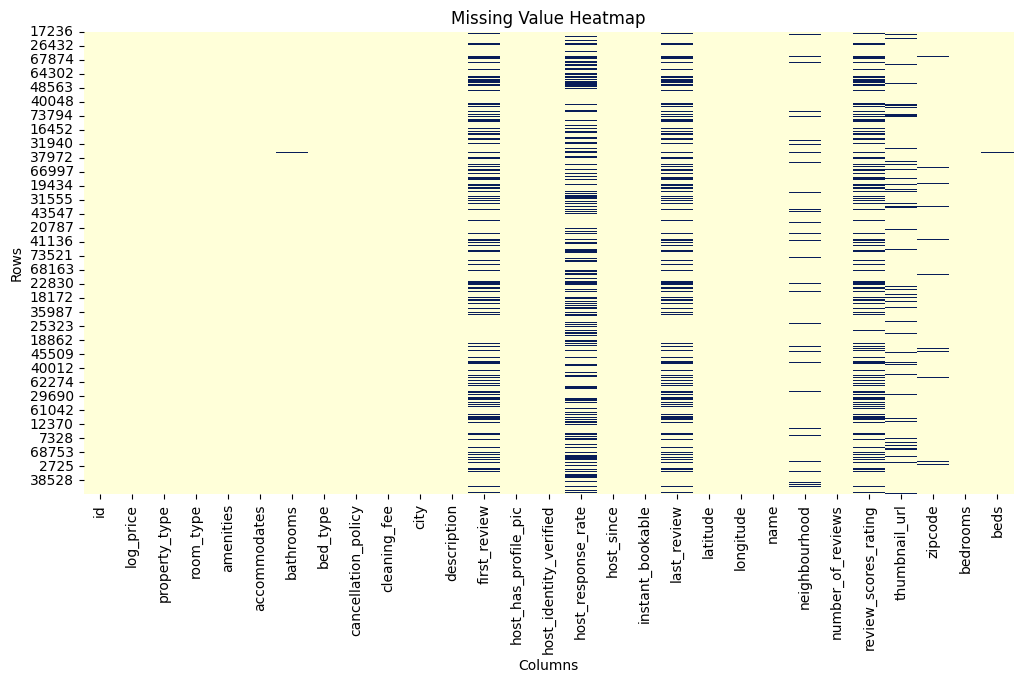

In [10]:
# Visualizing missing values in the dataset
plt.figure(figsize=(12, 6))
sns.heatmap(df_train.isna(), cmap='YlGnBu', cbar=False)
plt.title('Missing Value Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

Columns with a lot of missing data:

**Plotting two different parameters**
- Row count
- Years of first review and Price

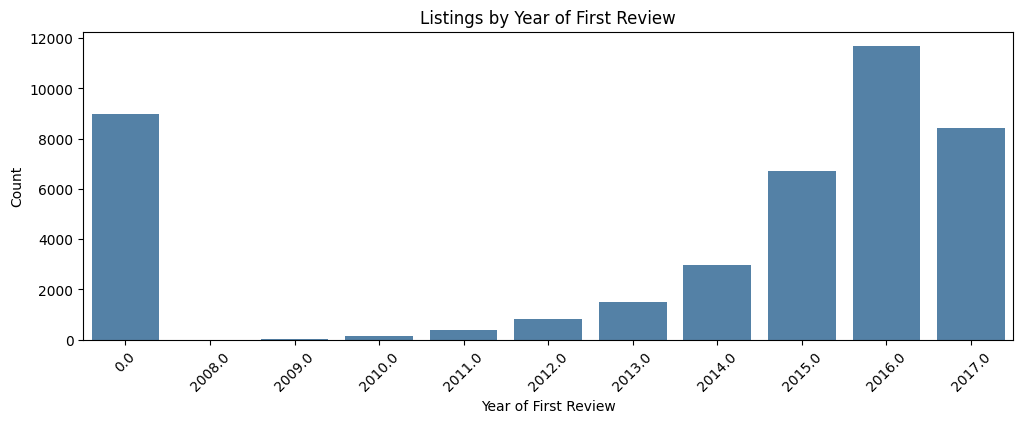

C:\Users\rocks\AppData\Local\Temp\ipykernel_20708\2815991414.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




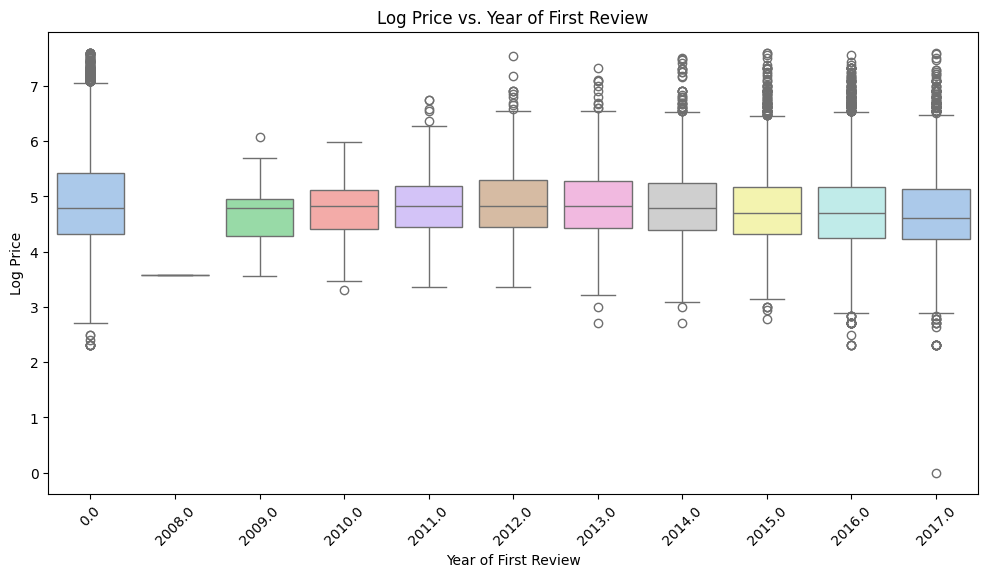

In [11]:
years_of_first_review = pd.DataFrame({
    'year of first review': pd.to_datetime(df_train['first_review'], errors='coerce').dt.year.fillna(0),
    'log_price': df_train['log_price']
})

# Countplot: number of properties by first review year
plt.figure(figsize=(12, 4))
sns.countplot(x="year of first review", data=years_of_first_review, color='steelblue')
plt.title('Listings by Year of First Review')
plt.xlabel('Year of First Review')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Boxplot: price distribution by year of first review
plt.figure(figsize=(12, 6))
sns.boxplot(x='year of first review', y='log_price', data=years_of_first_review, palette="pastel")
plt.title('Log Price vs. Year of First Review')
plt.xlabel('Year of First Review')
plt.ylabel('Log Price')
plt.xticks(rotation=45)
plt.show()

**Plotting two different parameters**
- Row count
* Price distribution for na and notna values in first_review column

C:\Users\rocks\AppData\Local\Temp\ipykernel_20708\214601240.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




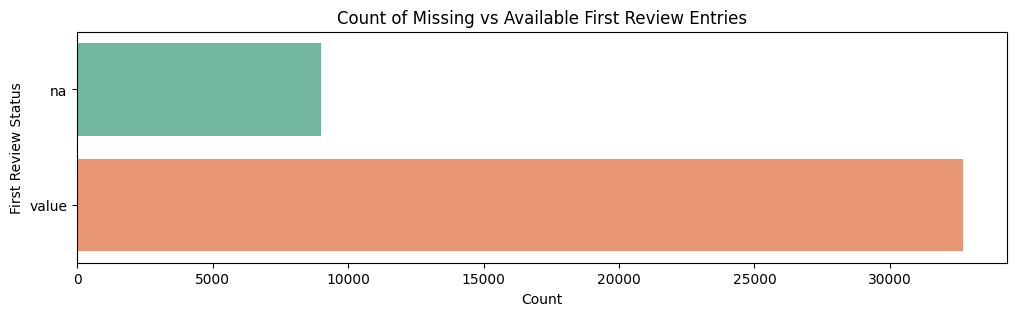

C:\Users\rocks\AppData\Local\Temp\ipykernel_20708\214601240.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




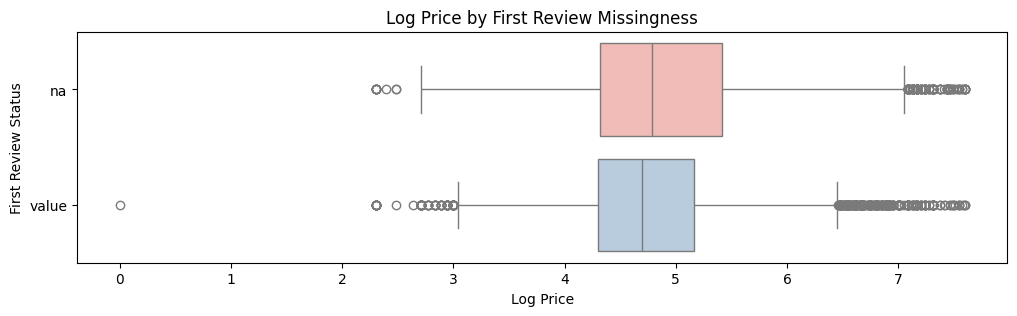

In [12]:
na_or_not = lambda x: 'na' if x else 'value'

# Create DataFrame capturing NA status of 'first_review' column
first_review_error_status = pd.DataFrame({
    'first review error status': df_train['first_review'].isna().apply(na_or_not),
    'log_price': df_train['log_price']
})

# Countplot: number of rows with/without missing values
plt.figure(figsize=(12, 3))
sns.countplot(y='first review error status', data=first_review_error_status, palette="Set2")
plt.title('Count of Missing vs Available First Review Entries')
plt.xlabel('Count')
plt.ylabel('First Review Status')
plt.show()

# Boxplot: price distribution based on NA status
plt.figure(figsize=(12, 3))
sns.boxplot(x='log_price', y='first review error status', data=first_review_error_status, palette="Pastel1")
plt.title('Log Price by First Review Missingness')
plt.xlabel('Log Price')
plt.ylabel('First Review Status')
plt.show()

**Price distribution for na and notna values in first_review column**

<Figure size 1000x500 with 0 Axes>

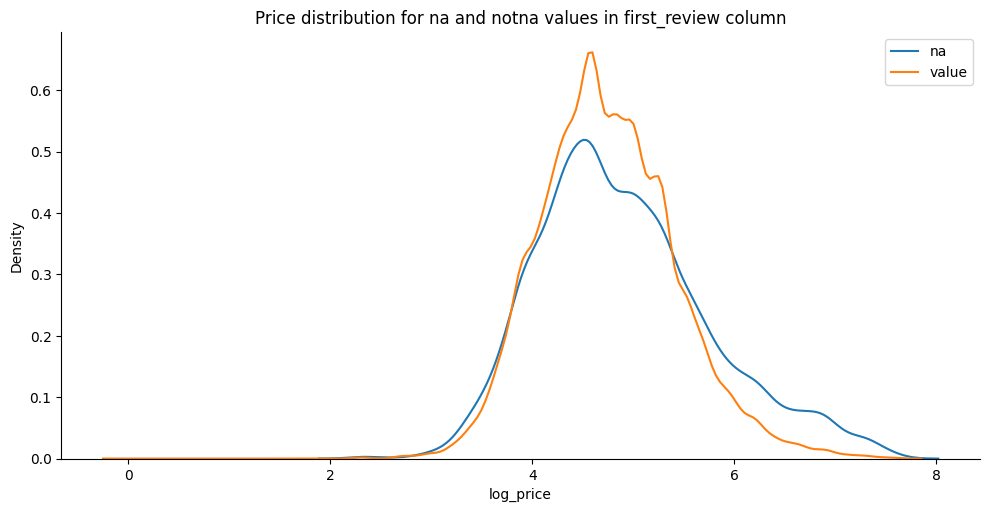

In [13]:
plt.figure(figsize=(10,5))
g = sns.FacetGrid(first_review_error_status, hue="first review error status", height = 5, aspect = 2)
g.map(sns.kdeplot, "log_price")
plt.legend()
plt.title('Price distribution for na and notna values in first_review column')
plt.show()

**Plotting two different parameters**
- Row count
- Years of last review and price

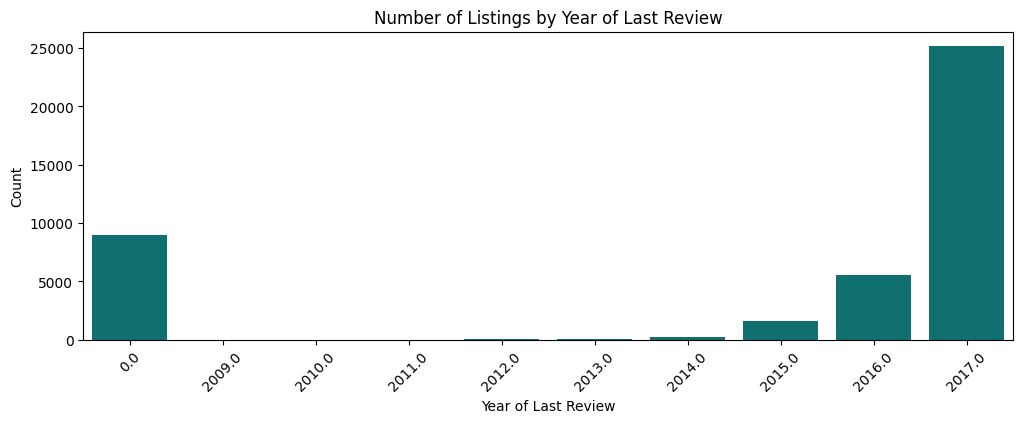

C:\Users\rocks\AppData\Local\Temp\ipykernel_20708\996958183.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




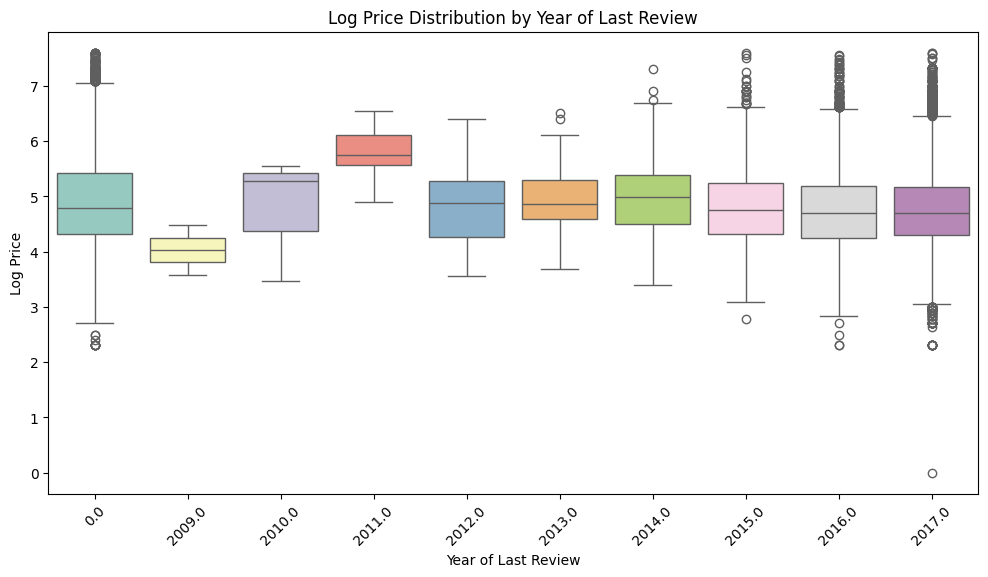

In [14]:
# Extract year of last review and pair with log_price
years_of_last_review = pd.DataFrame({
    'year of last review': pd.to_datetime(df_train['last_review'], errors='coerce').dt.year.fillna(0),
    'log_price': df_train['log_price']
})

# Countplot: number of listings by year of last review
plt.figure(figsize=(12, 4))
sns.countplot(x="year of last review", data=years_of_last_review, color="teal")
plt.title('Number of Listings by Year of Last Review')
plt.xlabel('Year of Last Review')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Boxplot: distribution of log_price across last review years
plt.figure(figsize=(12, 6))
sns.boxplot(x='year of last review', y='log_price', data=years_of_last_review, palette="Set3")
plt.title('Log Price Distribution by Year of Last Review')
plt.xlabel('Year of Last Review')
plt.ylabel('Log Price')
plt.xticks(rotation=45)
plt.show()

**Popular property types**

In [15]:
popular_property_types = list(df_train['property_type'].value_counts()[df_train['property_type'].value_counts() > 50].index)
popular_property_types

['Apartment',
 'House',
 'Condominium',
 'Townhouse',
 'Loft',
 'Other',
 'Guesthouse',
 'Bed & Breakfast',
 'Bungalow',
 'Villa',
 'Dorm',
 'Guest suite',
 'Camper/RV']

In [16]:
df_train['room_type'].value_counts()

room_type
Entire home/apt    23233
Private room       17235
Shared room         1219
Name: count, dtype: int64

In [17]:
df_train['bed_type'].value_counts()

bed_type
Real Bed         40461
Futon              453
Pull-out Sofa      343
Airbed             263
Couch              167
Name: count, dtype: int64

In [18]:
df_train['cancellation_policy'].value_counts()
popular_cancellation_policy = list(df_train['cancellation_policy'].value_counts()[df_train['cancellation_policy'].value_counts() > 100].index)
popular_cancellation_policy

['strict', 'flexible', 'moderate']

In [19]:
df_train['city'].value_counts()

city
NYC        18296
LA         12554
SF          3590
DC          3176
Chicago     2093
Boston      1978
Name: count, dtype: int64

In [20]:
df_train['host_response_rate'].value_counts()

host_response_rate
100%    24387
90%      1286
80%       647
0%        506
50%       327
        ...  
23%         1
41%         1
6%          1
21%         1
27%         1
Name: count, Length: 76, dtype: int64

In [21]:
df_train['review_scores_rating'].value_counts()

review_scores_rating
100.0    9093
98.0     2498
96.0     2336
97.0     2292
95.0     2124
93.0     2027
90.0     1568
99.0     1486
94.0     1463
80.0     1225
92.0     1182
91.0      887
87.0      624
89.0      623
88.0      598
85.0      341
86.0      298
84.0      239
60.0      234
83.0      223
70.0      118
82.0      111
73.0       82
81.0       80
78.0       56
75.0       51
20.0       51
40.0       46
77.0       44
79.0       44
67.0       37
76.0       30
72.0       22
74.0       22
50.0       19
65.0       12
71.0        9
68.0        9
69.0        9
64.0        7
63.0        7
53.0        6
57.0        2
55.0        2
27.0        2
30.0        2
47.0        2
56.0        1
66.0        1
35.0        1
54.0        1
62.0        1
Name: count, dtype: int64

In [22]:
df_train[df_train['bathrooms'].isna()].head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
22225,16384358,4.077537,Apartment,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,NaN,Real Bed,strict,False,NYC,15 min from the city!!! nice loft space apartm...,2013-09-28,t,f,100%,2012-06-14,f,2015-12-02,40.701396,-73.913335,Nice private space in Bklyn loft!,Bushwick,12,92.0,https://a0.muscache.com/im/pictures/6499936/af...,11237,1.0,1.0
10556,7682094,3.871201,Apartment,Private room,{},1,NaN,Real Bed,flexible,True,NYC,Massive 400 sq ft Bedroom in beautifully renov...,2015-03-31,t,f,NaN,2012-07-10,f,2015-03-31,40.710993,-73.952170,Huge Bdrm in New Wilibrg 3 Bed Loft,Williamsburg,1,80.0,https://a0.muscache.com/im/pictures/7324290/50...,11211,1.0,NaN
2842,12130093,4.382027,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,NaN,Futon,moderate,False,Chicago,This is a very small studio apartment with a ...,2009-07-03,t,f,100%,2009-05-19,f,2017-05-02,41.902845,-87.681830,Tiny Studio Apartment 94 Walk Score,Ukrainian Village,242,91.0,https://a0.muscache.com/im/pictures/51073/16c8...,60622,NaN,1.0
61508,8668115,4.025352,House,Private room,"{Internet,""Wireless Internet"",Kitchen,""transla...",2,NaN,Real Bed,strict,False,LA,Private Room for rent in Los Angeles. Short-te...,2013-09-07,t,t,96%,2012-05-08,f,2017-02-27,34.032356,-118.299849,Private Room for Rent near USC,West Adams,20,86.0,https://a0.muscache.com/im/pictures/7c98009f-9...,90007,1.0,1.0
24116,7309611,3.784190,Apartment,Private room,"{Internet,""Wireless Internet""}",2,NaN,Real Bed,strict,False,LA,Small Private Room with shared bathroom in Los...,2012-12-31,t,t,96%,2012-05-08,f,2017-03-20,34.042585,-118.346622,LA Boardinghouse - Simple Private Room,Mid-City,30,83.0,https://a0.muscache.com/im/pictures/39736169/e...,90019,1.0,1.0


In [23]:
df_train['bathrooms'].value_counts()

bathrooms
1.0    32751
2.0     4437
1.5     2131
2.5      920
3.0      553
3.5      235
4.0      156
0.5      113
0.0      100
4.5       64
5.0       39
5.5       22
8.0       16
6.0       12
6.5       10
7.0        8
7.5        4
Name: count, dtype: int64

In [24]:
df_train['host_has_profile_pic'].value_counts()

host_has_profile_pic
t    41448
f      125
Name: count, dtype: int64

**Plotting two different parameters**
- Row count
- years of host_price and price

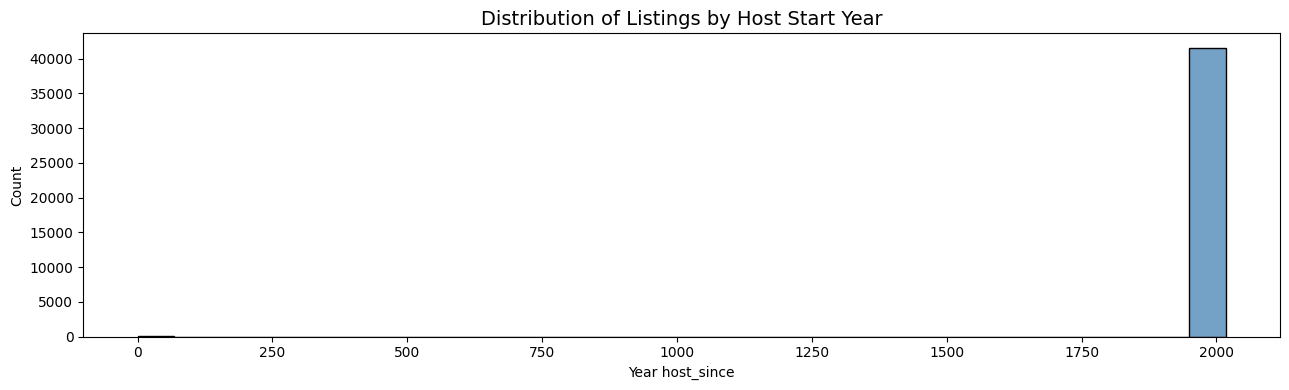

C:\Users\rocks\AppData\Local\Temp\ipykernel_20708\1943884885.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




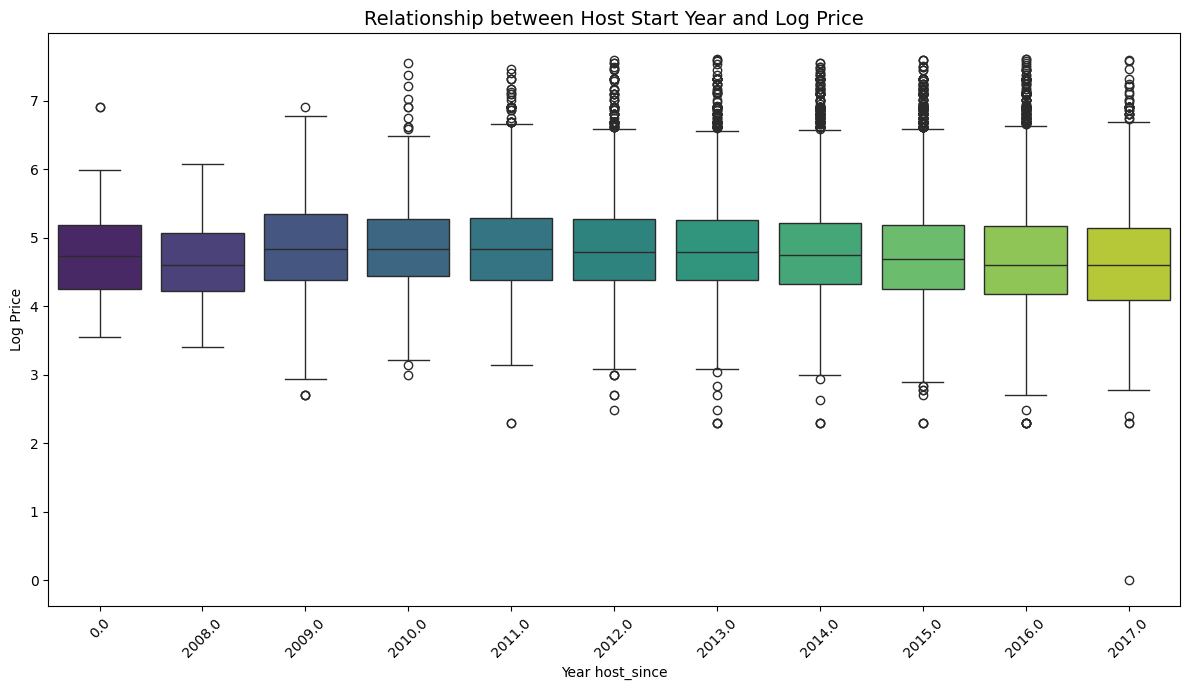

In [25]:
# Extract host_since year and pair it with log_price for analysis
years_of_host_since = pd.DataFrame({
    "year of host_since": pd.to_datetime(
        df_train["host_since"], format="%Y-%m-%d", errors="coerce"
    ).dt.year.fillna(0),
    "log_price": df_train["log_price"]
})

# --- Distribution of listings by host_since year ---
plt.figure(figsize=(13, 4))
sns.histplot(data=years_of_host_since, x="year of host_since", bins=30, color="steelblue")
plt.title("Distribution of Listings by Host Start Year", fontsize=14)
plt.xlabel("Year host_since")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# --- Price trends across host_since years ---
plt.figure(figsize=(12, 7))
sns.boxplot(
    x="year of host_since",
    y="log_price",
    data=years_of_host_since,
    palette="viridis"
)
plt.title("Relationship between Host Start Year and Log Price", fontsize=14)
plt.xticks(rotation=45)
plt.xlabel("Year host_since")
plt.ylabel("Log Price")
plt.tight_layout()
plt.show()


Price distribution of na values looks like one for 2008 values. I think, best of worst is to use 2008 value to fill na in this situation.

#### Visualizing the Overall Spread of Airbnb Listings

In [26]:
# Function to generate an interactive Airbnb map for a given city
def create_map(city):
    # Pick sample fraction depending on city size
    sample_fraction = 0.2 if city in {"NYC", "LA"} else 0.6
    
    # Subset and sample data for clarity
    df_temp = (
        df_train[df_train["city"] == city]
        .sample(frac=sample_fraction, random_state=101)
        .copy()
    )
    df_temp["log_price"] = df_temp["log_price"].round(2)

    # Create interactive scatter map
    fig = px.scatter_mapbox(
        df_temp,
        lat="latitude",
        lon="longitude",
        color="log_price",
        hover_name="log_price",
        hover_data={"latitude": False, "longitude": False},
        color_continuous_scale="plasma",
        zoom=10,
        height=600,
        width=950
    )

    # Customize layout
    fig.update_layout(
        title_text=f"Geospatial Distribution of Airbnb Prices in {city}",
        title_x=0.5,
        mapbox_style="carto-positron",
        margin={"r":0, "t":40, "l":0, "b":0}
    )

    fig.show()


# Example usage (fixed call, but can easily be linked with widgets)
create_map("NYC")


C:\Users\rocks\AppData\Local\Temp\ipykernel_20708\3852264851.py:15: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



### Outliers handling
An outlier is an object that deviates significantly from the rest of the objects. They can be caused by measurement or execution error. The analysis of outlier data is referred to as outlier analysis or outlier mining.

In [27]:
price_distr = pd.DataFrame(np.histogram(df_train['log_price'], bins = 50)).T
price_distr.columns = ['#', 'border']
price_distr.dropna(inplace = True)
price_distr.astype({'#': 'int32'})
price_distr

,#,border
0,1.0,0.000000
1,0.0,0.152008
2,0.0,0.304016
3,0.0,0.456024
4,0.0,0.608032
5,0.0,0.760040
6,0.0,0.912048
7,0.0,1.064056
8,0.0,1.216064
9,0.0,1.368072


In [28]:
df_train[(df_train['log_price'] < 2.5) | (df_train['log_price'] > 7.5)].sort_values(by = 'log_price')

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
11632,17972519,0.000000,Condominium,Shared room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",1,1.0,Real Bed,strict,True,NYC,Comfortable dwellings .. My comfy home is for ...,2017-08-17,t,f,100%,2017-07-20,t,2017-10-01,40.838054,-73.858665,Esteem's Place,Parkchester,3,87.0,https://a0.muscache.com/im/pictures/71bc085f-b...,10462,1.0,1.0
50577,11968056,2.302585,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,strict,False,NYC,"I am looking for a dog/house sitter, someone e...",NaN,t,t,67%,2011-08-09,f,NaN,40.867241,-73.918442,$10 a night!,Inwood,0,NaN,https://a0.muscache.com/im/pictures/e82f51c9-7...,10034,1.0,1.0
69004,15464274,2.302585,House,Entire home/apt,{},1,0.5,Real Bed,flexible,False,SF,This is a wonderful place to stay with rebecca!,NaN,t,t,NaN,2011-07-27,f,NaN,37.777460,-122.409477,"Incredible, bright Dogpatch loft!",SoMa,0,NaN,https://a0.muscache.com/im/pictures/111366014/...,94103,0.0,1.0
43269,10288459,2.302585,House,Shared room,"{""Wireless Internet"",""Air conditioning"",Heatin...",1,1.0,Couch,flexible,False,LA,We are pleased to welcome you in our warm plac...,NaN,t,f,NaN,2015-12-11,f,NaN,33.956903,-117.971333,Nice couch and extra comfort chair,NaN,0,NaN,https://a0.muscache.com/im/pictures/24b2d7a4-8...,90631,1.0,1.0
19806,14933982,2.302585,Apartment,Private room,"{TV,Washer,Dryer,Internet,""Wireless Internet"",...",2,1.0,Real Bed,flexible,False,SF,"Bright, comfy and spacious private bed and bat...",2017-09-23,t,t,NaN,2014-10-21,f,2017-09-23,37.782833,-122.390453,Private bed/bath in lux building,South Beach,1,100.0,https://a0.muscache.com/im/pictures/4b51f35c-e...,94107,1.0,1.0
25239,635662,2.302585,Apartment,Shared room,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,2.0,Real Bed,flexible,False,DC,If the dates that you want to book are not ava...,2016-05-31,t,t,100%,2016-03-03,t,2017-05-09,38.912090,-77.003552,Center of The Washington DC-BUNKS,Eckington,41,96.0,https://a0.muscache.com/im/pictures/2a11e401-c...,20002,1.0,4.0
4466,9117980,2.302585,Apartment,Private room,"{""Family/kid friendly"",Washer,Dryer,""translati...",1,1.0,Real Bed,flexible,False,LA,beautiful,NaN,t,f,NaN,2016-04-14,f,NaN,34.199755,-118.449201,apartment,Van Nuys,0,NaN,https://a0.muscache.com/im/pictures/28679947-5...,91405,1.0,1.0
53742,9937558,2.302585,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",3,1.0,Real Bed,flexible,True,NYC,"The Building is in the heart of Manhattan, nex...",2017-06-28,t,t,60%,2017-06-05,f,2017-09-01,40.753809,-73.985142,Lux Apartment @ Times Square,Midtown,4,95.0,https://a0.muscache.com/im/pictures/5331c3fe-6...,10001,0.0,1.0
27021,4868466,2.302585,Apartment,Entire home/apt,"{""Family/kid friendly"",""Hair dryer"",Iron}",5,1.0,Real Bed,flexible,False,LA,TEST!!,NaN,t,t,100%,2016-03-21,f,NaN,34.097784,-118.325798,TEST!!!!,NaN,0,NaN,NaN,NaN,1.0,4.0
60206,6357564,2.302585,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,False,DC,Please do NOT send a request unless you are a ...,2016-01-02,t,t,75%,2013-09-19,f,2016-10-03,38.901436,-77.047139,Free for Refugees & Bernie Sanders,NaN,5,100.0,NaN,20037,0.0,1.0


In [29]:
df_train.drop(df_train[df_train['log_price']==0].index, inplace = True)

For building reliable models, it’s sufficient to filter out listings with a price of 0, since such values don’t represent valid transactions.

In [30]:
df_train[df_train['log_price']< 2]

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds



### Data preparation

In [31]:
# Collect all unique amenities across listings
amenities_set = set()

for raw in df_train["amenities"]:
    # Remove quotes/braces and split into individual items
    cleaned = re.sub(r'["{}]', "", raw).split(",")
    
    # Strip and filter invalid entries
    for item in cleaned:
        item = item.strip()
        if item and "translation missing" not in item:
            amenities_set.add(item)

amenities_set


{'24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air purifier',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Bathtub',
 'Bathtub with shower chair',
 'Beach essentials',
 'Beachfront',
 'Bed linens',
 'Breakfast',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Cooking basics',
 'Crib',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Doorman Entry',
 'Dryer',
 'EV charger',
 'Elevator',
 'Elevator in building',
 'Essentials',
 'Ethernet connection',
 'Extra pillows and blankets',
 'Family/kid friendly',
 'Fire extinguisher',
 'Fireplace guards',
 'Firm matress',
 'Firm mattress',
 'First aid kit',
 'Fixed grab bars for shower & toilet',
 'Flat',
 'Flat smooth pathway to front door',
 'Free parking on premis

**Creating Dummy datasets and dataframes**

In [32]:
# --- Utility functions for preprocessing ---

def create_dummy(col, df):
    """One-hot encode a single categorical column with 'dum:' prefix."""
    dummies = pd.get_dummies(df[col], drop_first=True)
    dummies.columns = [f"dum: {col}: {val}" for val in dummies.columns]
    return dummies


def dummification(df):
    """Expand selected categorical columns into dummy variables."""
    object_cols = [
        "property_type", "room_type", "bed_type", 
        "cancellation_policy", "city", 
        "first_review", "neighbourhood"
    ]
    dummy_frames = [create_dummy(col, df) for col in object_cols]
    return pd.concat([df.drop(columns=object_cols), *dummy_frames], axis=1)


def dum_col_filling(main_col_val, dum_col_name, main_col_name):
    """Check whether a dummy value is present in the main column."""
    target_val = dum_col_name.replace(main_col_name + ": ", "")
    return int(target_val in main_col_val)


def set_to_dummies(df, column_name):
    """Convert a set-valued column into binary dummy indicators."""
    all_values = sorted(amenities_set)  # keep deterministic order
    dummy_names = [f"{column_name}: {val}" for val in all_values if val]

    # Initialize dummy DataFrame
    dummy_df = pd.DataFrame(0, index=df.index, columns=dummy_names)

    # Fill dummy values
    for i in df.index:
        for col in dummy_names:
            dummy_df.at[i, col] = dum_col_filling(df.at[i, column_name], col, column_name)

    return pd.concat([df, dummy_df], axis=1)


# --- Column-level transformations ---

def property_type_proc(val):
    return val if val in popular_property_types else "other"


def cancellation_policy_proc(val):
    return val if val in popular_cancellation_policy else "other"


def host_response_rate_proc(val):
    return -100 if pd.isna(val) else float(val.replace("%", ""))


def first_review_proc(val):
    if pd.isna(val):
        return "no data"
    year = datetime.strptime(val, "%Y-%m-%d").year
    return " < 2014" if year < 2014 else str(year)


def unknown_filling(val):
    return "no data" if pd.isna(val) else val


def host_since_proc(val):
    return 2008 if pd.isna(val) else int(datetime.strptime(val, "%Y-%m-%d").year)


def true_to_1(val):
    return int(val in {"True", True, "t"})


# --- Main preprocessing pipeline ---

def processing(df):
    df = df.copy()

    # Apply column-specific functions
    df["property_type"] = df["property_type"].apply(property_type_proc)
    df["cancellation_policy"] = df["cancellation_policy"].apply(cancellation_policy_proc)
    df["host_response_rate"] = df["host_response_rate"].apply(host_response_rate_proc)
    df["first_review"] = df["first_review"].apply(first_review_proc)
    df["neighbourhood"] = df["neighbourhood"].apply(unknown_filling)
    df["host_since"] = df["host_since"].apply(host_since_proc)

    # Fill numeric NA with sentinel values
    df["review_scores_rating"] = df["review_scores_rating"].fillna(0)
    df["bathrooms"] = df["bathrooms"].fillna(-1)
    df["bedrooms"] = df["bedrooms"].fillna(-1)
    df["beds"] = df["beds"].fillna(-1)

    # Handle booleans and flags
    for col in ["host_has_profile_pic", "host_identity_verified"]:
        df[col] = df[col].fillna("f").apply(true_to_1)
    df["cleaning_fee"] = df["cleaning_fee"].apply(true_to_1)
    df["instant_bookable"] = df["instant_bookable"].apply(true_to_1)

    # Expand amenities and categorical dummies
    df = set_to_dummies(df, "amenities")
    df = dummification(df)

    # Drop unused columns
    drop_cols = ["amenities", "thumbnail_url", "description", 
                 "id", "last_review", "zipcode", "name"]
    df = df.drop(columns=drop_cols)

    # Sort columns for consistency
    return df.sort_index(axis=1, ascending=False)


# --- Example usage ---
df_d = processing(df_train)
df_d.head()


,review_scores_rating,number_of_reviews,longitude,log_price,latitude,instant_bookable,host_since,host_response_rate,host_identity_verified,host_has_profile_pic,dum: room_type: Shared room,dum: room_type: Private room,dum: property_type: other,dum: property_type: Villa,dum: property_type: Townhouse,dum: property_type: Other,dum: property_type: Loft,dum: property_type: House,dum: property_type: Guesthouse,dum: property_type: Guest suite,dum: property_type: Dorm,dum: property_type: Condominium,dum: property_type: Camper/RV,dum: property_type: Bungalow,dum: property_type: Bed & Breakfast,dum: neighbourhood: no data,dum: neighbourhood: Wrigleyville,dum: neighbourhood: Woodside,dum: neighbourhood: Woodridge,dum: neighbourhood: Woodley Park,dum: neighbourhood: Woodlawn,dum: neighbourhood: Woodland Hills/Warner Center,dum: neighbourhood: Woodland,dum: neighbourhood: Woodhaven,dum: neighbourhood: Winthrop,dum: neighbourhood: Winnetka,dum: neighbourhood: Windsor Terrace,dum: neighbourhood: Wilmington,dum: neighbourhood: Williamsburg,dum: neighbourhood: Williamsbridge,dum: neighbourhood: Wicker Park,dum: neighbourhood: Whittier,dum: neighbourhood: Whitestone,dum: neighbourhood: Westwood,dum: neighbourhood: Westside,dum: neighbourhood: Westlake,dum: neighbourhood: Western Addition/NOPA,dum: neighbourhood: Westerleigh,dum: neighbourhood: Westchester/Playa Del Rey,dum: neighbourhood: Westchester Village,dum: neighbourhood: West Village,dum: neighbourhood: West Town/Noble Square,dum: neighbourhood: West Town,dum: neighbourhood: West Roxbury,dum: neighbourhood: West Ridge,dum: neighbourhood: West Puente Valley,dum: neighbourhood: West Portal,dum: neighbourhood: West Los Angeles,dum: neighbourhood: West Loop/Greektown,dum: neighbourhood: West Lawn,dum: neighbourhood: West Hollywood,dum: neighbourhood: West Hills,dum: neighbourhood: West Farms,dum: neighbourhood: West End,dum: neighbourhood: West Elsdon,dum: neighbourhood: West Covina,dum: neighbourhood: West Brighton,dum: neighbourhood: West Athens,dum: neighbourhood: West Adams,dum: neighbourhood: Wesley Heights,dum: neighbourhood: Watts,dum: neighbourhood: Watertown,dum: neighbourhood: Washington Park,dum: neighbourhood: Washington Highlands,dum: neighbourhood: Washington Heights,dum: neighbourhood: Wakefield,dum: neighbourhood: Visitacion Valley,dum: neighbourhood: Vinegar Hill,dum: neighbourhood: Venice,dum: neighbourhood: Van Nuys,dum: neighbourhood: Van Nest,dum: neighbourhood: Valley Village,dum: neighbourhood: Valley Glen,dum: neighbourhood: Utopia,dum: neighbourhood: Uptown,dum: neighbourhood: Upper West Side,dum: neighbourhood: Upper East Side,dum: neighbourhood: University Heights,dum: neighbourhood: Union Square,dum: neighbourhood: Ukrainian Village,dum: neighbourhood: U Street Corridor,dum: neighbourhood: Twining,dum: neighbourhood: Twin Peaks,dum: neighbourhood: Truxton Circle,dum: neighbourhood: Trinidad,dum: neighbourhood: Tribeca,dum: neighbourhood: Tremont,dum: neighbourhood: Tottenville,dum: neighbourhood: Torrance,dum: neighbourhood: Topanga,dum: neighbourhood: Tompkinsville,dum: neighbourhood: Toluca Lake,dum: neighbourhood: Times Square/Theatre District,dum: neighbourhood: Throgs Neck,dum: neighbourhood: Theater District,dum: neighbourhood: The Rockaways,dum: neighbourhood: The Castro,dum: neighbourhood: The Bronx,dum: neighbourhood: Tenderloin,dum: neighbourhood: Temple City,dum: neighbourhood: Telegraph Hill,dum: neighbourhood: Tarzana,"dum: neighbourhood: Takoma Park, MD",dum: neighbourhood: Takoma,dum: neighbourhood: Sylmar,dum: neighbourhood: Sunset Park,dum: neighbourhood: Sunnyside,dum: neighbourhood: Sunland/Tujunga,dum: neighbourhood: Sun Valley,"dum: neighbourhood: Suitland-Silver Hill, MD",dum: neighbourhood: Studio City,dum: neighbourhood: Stronghold,dum: neighbourhood: Streeterville,dum: neighbourhood: Stapleton,dum: neighbourhood: St. George,dum: neighbourhood: St. Elizabeths,dum: neighbourhood: Spuyten Duyvil,dum: neighbourhood: Spring Valley,dum: neighbour

In [33]:
df_d[df_d.isnull().any(axis=1)]

,review_scores_rating,number_of_reviews,longitude,log_price,latitude,instant_bookable,host_since,host_response_rate,host_identity_verified,host_has_profile_pic,dum: room_type: Shared room,dum: room_type: Private room,dum: property_type: other,dum: property_type: Villa,dum: property_type: Townhouse,dum: property_type: Other,dum: property_type: Loft,dum: property_type: House,dum: property_type: Guesthouse,dum: property_type: Guest suite,dum: property_type: Dorm,dum: property_type: Condominium,dum: property_type: Camper/RV,dum: property_type: Bungalow,dum: property_type: Bed & Breakfast,dum: neighbourhood: no data,dum: neighbourhood: Wrigleyville,dum: neighbourhood: Woodside,dum: neighbourhood: Woodridge,dum: neighbourhood: Woodley Park,dum: neighbourhood: Woodlawn,dum: neighbourhood: Woodland Hills/Warner Center,dum: neighbourhood: Woodland,dum: neighbourhood: Woodhaven,dum: neighbourhood: Winthrop,dum: neighbourhood: Winnetka,dum: neighbourhood: Windsor Terrace,dum: neighbourhood: Wilmington,dum: neighbourhood: Williamsburg,dum: neighbourhood: Williamsbridge,dum: neighbourhood: Wicker Park,dum: neighbourhood: Whittier,dum: neighbourhood: Whitestone,dum: neighbourhood: Westwood,dum: neighbourhood: Westside,dum: neighbourhood: Westlake,dum: neighbourhood: Western Addition/NOPA,dum: neighbourhood: Westerleigh,dum: neighbourhood: Westchester/Playa Del Rey,dum: neighbourhood: Westchester Village,dum: neighbourhood: West Village,dum: neighbourhood: West Town/Noble Square,dum: neighbourhood: West Town,dum: neighbourhood: West Roxbury,dum: neighbourhood: West Ridge,dum: neighbourhood: West Puente Valley,dum: neighbourhood: West Portal,dum: neighbourhood: West Los Angeles,dum: neighbourhood: West Loop/Greektown,dum: neighbourhood: West Lawn,dum: neighbourhood: West Hollywood,dum: neighbourhood: West Hills,dum: neighbourhood: West Farms,dum: neighbourhood: West End,dum: neighbourhood: West Elsdon,dum: neighbourhood: West Covina,dum: neighbourhood: West Brighton,dum: neighbourhood: West Athens,dum: neighbourhood: West Adams,dum: neighbourhood: Wesley Heights,dum: neighbourhood: Watts,dum: neighbourhood: Watertown,dum: neighbourhood: Washington Park,dum: neighbourhood: Washington Highlands,dum: neighbourhood: Washington Heights,dum: neighbourhood: Wakefield,dum: neighbourhood: Visitacion Valley,dum: neighbourhood: Vinegar Hill,dum: neighbourhood: Venice,dum: neighbourhood: Van Nuys,dum: neighbourhood: Van Nest,dum: neighbourhood: Valley Village,dum: neighbourhood: Valley Glen,dum: neighbourhood: Utopia,dum: neighbourhood: Uptown,dum: neighbourhood: Upper West Side,dum: neighbourhood: Upper East Side,dum: neighbourhood: University Heights,dum: neighbourhood: Union Square,dum: neighbourhood: Ukrainian Village,dum: neighbourhood: U Street Corridor,dum: neighbourhood: Twining,dum: neighbourhood: Twin Peaks,dum: neighbourhood: Truxton Circle,dum: neighbourhood: Trinidad,dum: neighbourhood: Tribeca,dum: neighbourhood: Tremont,dum: neighbourhood: Tottenville,dum: neighbourhood: Torrance,dum: neighbourhood: Topanga,dum: neighbourhood: Tompkinsville,dum: neighbourhood: Toluca Lake,dum: neighbourhood: Times Square/Theatre District,dum: neighbourhood: Throgs Neck,dum: neighbourhood: Theater District,dum: neighbourhood: The Rockaways,dum: neighbourhood: The Castro,dum: neighbourhood: The Bronx,dum: neighbourhood: Tenderloin,dum: neighbourhood: Temple City,dum: neighbourhood: Telegraph Hill,dum: neighbourhood: Tarzana,"dum: neighbourhood: Takoma Park, MD",dum: neighbourhood: Takoma,dum: neighbourhood: Sylmar,dum: neighbourhood: Sunset Park,dum: neighbourhood: Sunnyside,dum: neighbourhood: Sunland/Tujunga,dum: neighbourhood: Sun Valley,"dum: neighbourhood: Suitland-Silver Hill, MD",dum: neighbourhood: Studio City,dum: neighbourhood: Stronghold,dum: neighbourhood: Streeterville,dum: neighbourhood: Stapleton,dum: neighbourhood: St. George,dum: neighbourhood: St. Elizabeths,dum: neighbourhood: Spuyten Duyvil,dum: neighbourhood: Spring Valley,dum: neighbour

### Prediction Model: Training & Deployment

Predictive modeling is a branch of data analytics that uses patterns in historical data to estimate future outcomes. Models are constructed from predictor variables (features) that are most informative for the target. Once relevant data is assembled, we fit an analytical model that learns the relationship between inputs and the response.

We’ll build and compare five algorithms:

Linear Regression
A baseline linear model that assumes a straight-line relationship between features 
X
X and target 
y
y. Parameters are typically estimated with Ordinary Least Squares (OLS), minimizing the sum of squared residuals.

Random Forest Regressor
An ensemble of decision trees trained on bootstrapped samples. Predictions are averaged across trees (bagging), which reduces variance and usually improves generalization compared to a single tree.

Gradient Boosting Regressor
A boosting method that builds trees sequentially, each new tree correcting the errors of the combined model so far. This often yields strong accuracy on structured/tabular data.

Neural Networks
Layered nonlinear models inspired by biological neurons. By stacking layers and activations, they can learn complex, non-linear relationships between features and the target.

Next steps:

1. Split data into training/validation (and test if available).

2. Fit each model on the training set.

3. Evaluate with appropriate regression metrics (e.g., RMSE/MAE/R²).

4. Tune hyperparameters for the top performers.

5. Finalize and serialize the best model for deployment.

Let’s proceed to train and evaluate the models.

In [34]:
#adding missing columns to test \ validation sets and deleting unnecessary
columns_needed = set(df_d.columns)
def columns_standardization(df):
    df = df.copy()
    for col in columns_needed:
        if col not in set(df.columns):
            df.insert(loc = len(df.columns), column = col, value = 0, allow_duplicates=False)
    
    for col in set(df.columns):
        if col not in columns_needed:
            df.drop(columns = col, axis = 1, inplace = True)
    
    return df.sort_index(ascending=False, axis=1)

In [35]:
test = columns_standardization(processing(df_test))
test

,review_scores_rating,number_of_reviews,longitude,log_price,latitude,instant_bookable,host_since,host_response_rate,host_identity_verified,host_has_profile_pic,dum: room_type: Shared room,dum: room_type: Private room,dum: property_type: other,dum: property_type: Villa,dum: property_type: Townhouse,dum: property_type: Other,dum: property_type: Loft,dum: property_type: House,dum: property_type: Guesthouse,dum: property_type: Guest suite,dum: property_type: Dorm,dum: property_type: Condominium,dum: property_type: Camper/RV,dum: property_type: Bungalow,dum: property_type: Bed & Breakfast,dum: neighbourhood: no data,dum: neighbourhood: Wrigleyville,dum: neighbourhood: Woodside,dum: neighbourhood: Woodridge,dum: neighbourhood: Woodley Park,dum: neighbourhood: Woodlawn,dum: neighbourhood: Woodland Hills/Warner Center,dum: neighbourhood: Woodland,dum: neighbourhood: Woodhaven,dum: neighbourhood: Winthrop,dum: neighbourhood: Winnetka,dum: neighbourhood: Windsor Terrace,dum: neighbourhood: Wilmington,dum: neighbourhood: Williamsburg,dum: neighbourhood: Williamsbridge,dum: neighbourhood: Wicker Park,dum: neighbourhood: Whittier,dum: neighbourhood: Whitestone,dum: neighbourhood: Westwood,dum: neighbourhood: Westside,dum: neighbourhood: Westlake,dum: neighbourhood: Western Addition/NOPA,dum: neighbourhood: Westerleigh,dum: neighbourhood: Westchester/Playa Del Rey,dum: neighbourhood: Westchester Village,dum: neighbourhood: West Village,dum: neighbourhood: West Town/Noble Square,dum: neighbourhood: West Town,dum: neighbourhood: West Roxbury,dum: neighbourhood: West Ridge,dum: neighbourhood: West Puente Valley,dum: neighbourhood: West Portal,dum: neighbourhood: West Los Angeles,dum: neighbourhood: West Loop/Greektown,dum: neighbourhood: West Lawn,dum: neighbourhood: West Hollywood,dum: neighbourhood: West Hills,dum: neighbourhood: West Farms,dum: neighbourhood: West End,dum: neighbourhood: West Elsdon,dum: neighbourhood: West Covina,dum: neighbourhood: West Brighton,dum: neighbourhood: West Athens,dum: neighbourhood: West Adams,dum: neighbourhood: Wesley Heights,dum: neighbourhood: Watts,dum: neighbourhood: Watertown,dum: neighbourhood: Washington Park,dum: neighbourhood: Washington Highlands,dum: neighbourhood: Washington Heights,dum: neighbourhood: Wakefield,dum: neighbourhood: Visitacion Valley,dum: neighbourhood: Vinegar Hill,dum: neighbourhood: Venice,dum: neighbourhood: Van Nuys,dum: neighbourhood: Van Nest,dum: neighbourhood: Valley Village,dum: neighbourhood: Valley Glen,dum: neighbourhood: Utopia,dum: neighbourhood: Uptown,dum: neighbourhood: Upper West Side,dum: neighbourhood: Upper East Side,dum: neighbourhood: University Heights,dum: neighbourhood: Union Square,dum: neighbourhood: Ukrainian Village,dum: neighbourhood: U Street Corridor,dum: neighbourhood: Twining,dum: neighbourhood: Twin Peaks,dum: neighbourhood: Truxton Circle,dum: neighbourhood: Trinidad,dum: neighbourhood: Tribeca,dum: neighbourhood: Tremont,dum: neighbourhood: Tottenville,dum: neighbourhood: Torrance,dum: neighbourhood: Topanga,dum: neighbourhood: Tompkinsville,dum: neighbourhood: Toluca Lake,dum: neighbourhood: Times Square/Theatre District,dum: neighbourhood: Throgs Neck,dum: neighbourhood: Theater District,dum: neighbourhood: The Rockaways,dum: neighbourhood: The Castro,dum: neighbourhood: The Bronx,dum: neighbourhood: Tenderloin,dum: neighbourhood: Temple City,dum: neighbourhood: Telegraph Hill,dum: neighbourhood: Tarzana,"dum: neighbourhood: Takoma Park, MD",dum: neighbourhood: Takoma,dum: neighbourhood: Sylmar,dum: neighbourhood: Sunset Park,dum: neighbourhood: Sunnyside,dum: neighbourhood: Sunland/Tujunga,dum: neighbourhood: Sun Valley,"dum: neighbourhood: Suitland-Silver Hill, MD",dum: neighbourhood: Studio City,dum: neighbourhood: Stronghold,dum: neighbourhood: Streeterville,dum: neighbourhood: Stapleton,dum: neighbourhood: St. George,dum: neighbourhood: St. Elizabeths,dum: neighbourhood: Spuyten Duyvil,dum: neighbourhood: Spring Valley,dum: neighbour

In [36]:
test[test.isnull().any(axis=1)]

,review_scores_rating,number_of_reviews,longitude,log_price,latitude,instant_bookable,host_since,host_response_rate,host_identity_verified,host_has_profile_pic,dum: room_type: Shared room,dum: room_type: Private room,dum: property_type: other,dum: property_type: Villa,dum: property_type: Townhouse,dum: property_type: Other,dum: property_type: Loft,dum: property_type: House,dum: property_type: Guesthouse,dum: property_type: Guest suite,dum: property_type: Dorm,dum: property_type: Condominium,dum: property_type: Camper/RV,dum: property_type: Bungalow,dum: property_type: Bed & Breakfast,dum: neighbourhood: no data,dum: neighbourhood: Wrigleyville,dum: neighbourhood: Woodside,dum: neighbourhood: Woodridge,dum: neighbourhood: Woodley Park,dum: neighbourhood: Woodlawn,dum: neighbourhood: Woodland Hills/Warner Center,dum: neighbourhood: Woodland,dum: neighbourhood: Woodhaven,dum: neighbourhood: Winthrop,dum: neighbourhood: Winnetka,dum: neighbourhood: Windsor Terrace,dum: neighbourhood: Wilmington,dum: neighbourhood: Williamsburg,dum: neighbourhood: Williamsbridge,dum: neighbourhood: Wicker Park,dum: neighbourhood: Whittier,dum: neighbourhood: Whitestone,dum: neighbourhood: Westwood,dum: neighbourhood: Westside,dum: neighbourhood: Westlake,dum: neighbourhood: Western Addition/NOPA,dum: neighbourhood: Westerleigh,dum: neighbourhood: Westchester/Playa Del Rey,dum: neighbourhood: Westchester Village,dum: neighbourhood: West Village,dum: neighbourhood: West Town/Noble Square,dum: neighbourhood: West Town,dum: neighbourhood: West Roxbury,dum: neighbourhood: West Ridge,dum: neighbourhood: West Puente Valley,dum: neighbourhood: West Portal,dum: neighbourhood: West Los Angeles,dum: neighbourhood: West Loop/Greektown,dum: neighbourhood: West Lawn,dum: neighbourhood: West Hollywood,dum: neighbourhood: West Hills,dum: neighbourhood: West Farms,dum: neighbourhood: West End,dum: neighbourhood: West Elsdon,dum: neighbourhood: West Covina,dum: neighbourhood: West Brighton,dum: neighbourhood: West Athens,dum: neighbourhood: West Adams,dum: neighbourhood: Wesley Heights,dum: neighbourhood: Watts,dum: neighbourhood: Watertown,dum: neighbourhood: Washington Park,dum: neighbourhood: Washington Highlands,dum: neighbourhood: Washington Heights,dum: neighbourhood: Wakefield,dum: neighbourhood: Visitacion Valley,dum: neighbourhood: Vinegar Hill,dum: neighbourhood: Venice,dum: neighbourhood: Van Nuys,dum: neighbourhood: Van Nest,dum: neighbourhood: Valley Village,dum: neighbourhood: Valley Glen,dum: neighbourhood: Utopia,dum: neighbourhood: Uptown,dum: neighbourhood: Upper West Side,dum: neighbourhood: Upper East Side,dum: neighbourhood: University Heights,dum: neighbourhood: Union Square,dum: neighbourhood: Ukrainian Village,dum: neighbourhood: U Street Corridor,dum: neighbourhood: Twining,dum: neighbourhood: Twin Peaks,dum: neighbourhood: Truxton Circle,dum: neighbourhood: Trinidad,dum: neighbourhood: Tribeca,dum: neighbourhood: Tremont,dum: neighbourhood: Tottenville,dum: neighbourhood: Torrance,dum: neighbourhood: Topanga,dum: neighbourhood: Tompkinsville,dum: neighbourhood: Toluca Lake,dum: neighbourhood: Times Square/Theatre District,dum: neighbourhood: Throgs Neck,dum: neighbourhood: Theater District,dum: neighbourhood: The Rockaways,dum: neighbourhood: The Castro,dum: neighbourhood: The Bronx,dum: neighbourhood: Tenderloin,dum: neighbourhood: Temple City,dum: neighbourhood: Telegraph Hill,dum: neighbourhood: Tarzana,"dum: neighbourhood: Takoma Park, MD",dum: neighbourhood: Takoma,dum: neighbourhood: Sylmar,dum: neighbourhood: Sunset Park,dum: neighbourhood: Sunnyside,dum: neighbourhood: Sunland/Tujunga,dum: neighbourhood: Sun Valley,"dum: neighbourhood: Suitland-Silver Hill, MD",dum: neighbourhood: Studio City,dum: neighbourhood: Stronghold,dum: neighbourhood: Streeterville,dum: neighbourhood: Stapleton,dum: neighbourhood: St. George,dum: neighbourhood: St. Elizabeths,dum: neighbourhood: Spuyten Duyvil,dum: neighbourhood: Spring Valley,dum: neighbour

In [37]:
def show_metrics(prediction_test, prediction_train, y_test, y_train):
    MAE = round(metrics.mean_absolute_error(y_test, prediction_test), 2)
    MSE = round(metrics.mean_squared_error(y_test, prediction_test), 2)
    RMSE = round(np.sqrt(metrics.mean_squared_error(y_test, prediction_test)), 2)
    RMSE_ratio_test= round(np.sqrt(metrics.mean_squared_error(y_test, prediction_test)) / np.mean(y_test),3)
    RMSE_ratio_train = round(np.sqrt(metrics.mean_squared_error(y_train, prediction_train)) / np.mean(y_train),3)
    R_2_test = round(metrics.explained_variance_score(y_test, prediction_test), 2)
    R_2_train = round(metrics.explained_variance_score(y_train, prediction_train), 2)
    
    metrics_data = pd.DataFrame(data = [MAE, MSE, RMSE, RMSE_ratio_test, 
                                    RMSE_ratio_train, R_2_test, R_2_train]).T
    
    metrics_data.columns = ['MAE', 'MSE', 'RMSE', 'RMSE_ratio_test', 
                                    'RMSE_ratio_train', 'R_2_test', 'R_2_train']
    display(metrics_data)
           


def analysis(model, X_train, X_test, y_train, y_test):
    
    prediction_test = model.predict(X_test)
    prediction_train = model.predict(X_train)
        
    
    show_metrics(prediction_test, prediction_train, y_test, y_train)
    
    sns.regplot(x = y_test, y = prediction_test, fit_reg=False)
    plt.title('Prediction and real')
    plt.show()

    sns.distplot(y_test - prediction_test, bins = 50)
    plt.title('Error variance')
    plt.show()

### Linear Regression
Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). ... Different techniques can be used to prepare or train the linear regression equation from data, the most common of which is called Ordinary Least Squares.

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,0.3,0.16,0.41,0.085,0.084,0.68,0.68


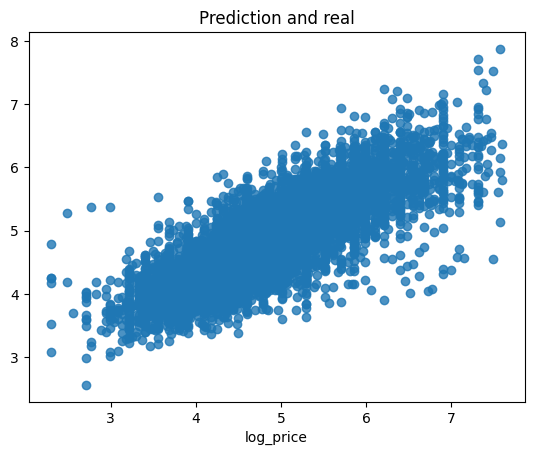

C:\Users\rocks\AppData\Local\Temp\ipykernel_20708\4124505080.py:31: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




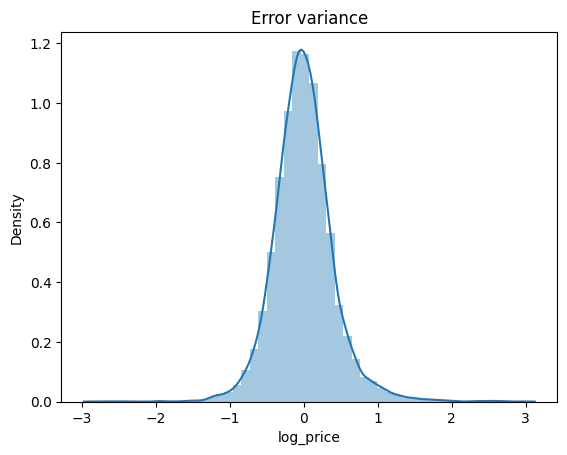

In [40]:
lm = LinearRegression(
        n_jobs = -1,
)

lm.fit(df_d.drop('log_price', axis = 1), df_d['log_price'])

comment = ''

analysis(
    model = lm, 
    X_train = df_d.drop('log_price', axis = 1), 
    X_test = test.drop('log_price', axis = 1), 
    y_train = df_d['log_price'], 
    y_test = test['log_price']
)

### Random Forest Regressor
A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.


,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,0.3,0.16,0.4,0.084,0.077,0.68,0.73


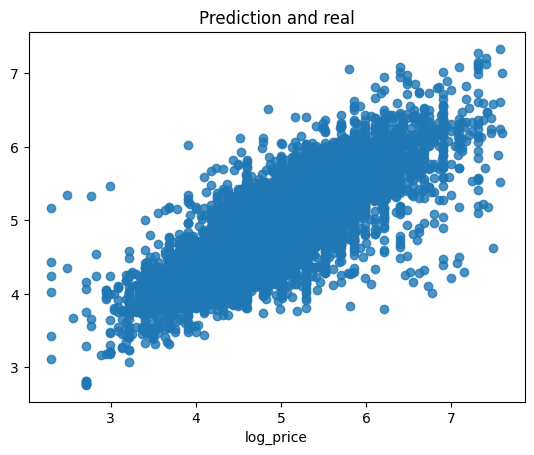

C:\Users\rocks\AppData\Local\Temp\ipykernel_20708\4124505080.py:31: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




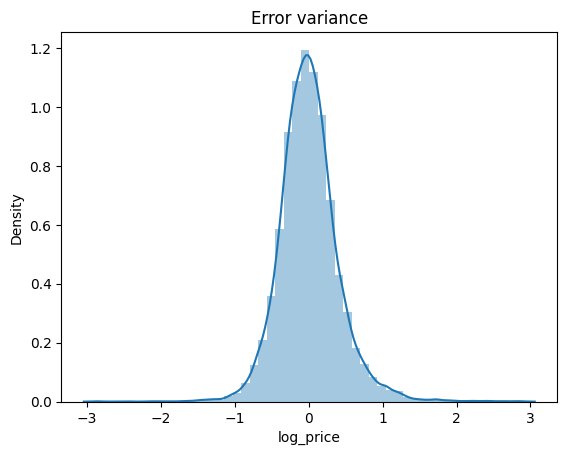

In [41]:
rfm = RandomForestRegressor(
          max_depth = 10,
          n_jobs = -1, 
          random_state = 101,
          n_estimators = 700
    
)
rfm.fit(df_d.drop('log_price', axis = 1), df_d['log_price'])

comment = ''

analysis(
    model = rfm, 
    X_train = df_d.drop('log_price', axis = 1), 
    X_test = test.drop('log_price', axis = 1), 
    y_train = df_d['log_price'], 
    y_test = test['log_price']
)

### Gradient Boosting Algorithm
Gradient boosting is a machine learning technique for regression, classification and other tasks, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees.

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,0.3,0.16,0.41,0.085,0.085,0.68,0.68


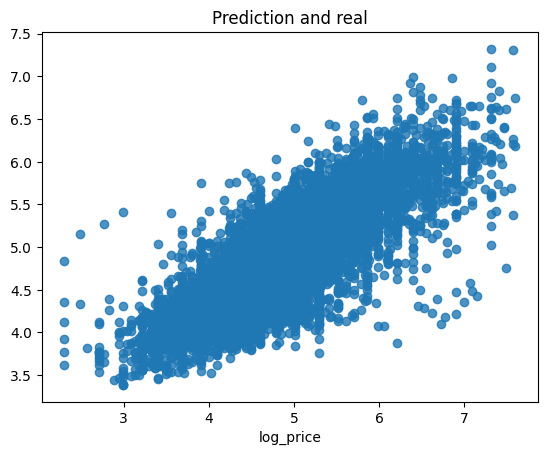

C:\Users\rocks\AppData\Local\Temp\ipykernel_20708\4124505080.py:31: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




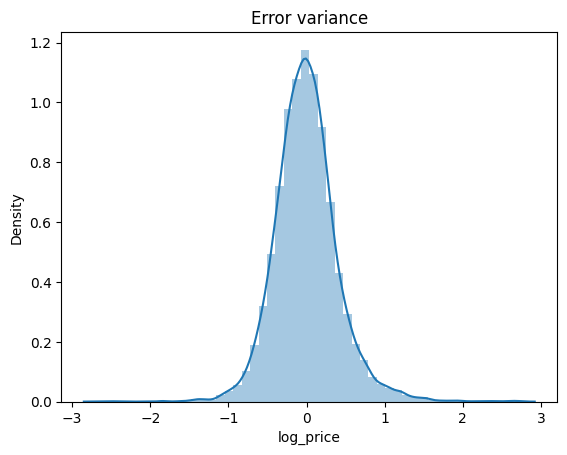

In [42]:
gbr_model = GradientBoostingRegressor(random_state = 101)
gbr_model.fit(df_d.drop('log_price', axis = 1), df_d['log_price'])

comment = ''

analysis(
    model = gbr_model, 
    X_train = df_d.drop('log_price', axis = 1), 
    X_test = test.drop('log_price', axis = 1), 
    y_train = df_d['log_price'], 
    y_test = test['log_price']
)

### Dense Neural Networks
Neural networks, also known as artificial neural networks (ANNs) or simulated neural networks (SNNs), are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.

**MinMaxScaler** : 
MinMaxScaler preserves the shape of the original distribution. It doesn't meaningfully change the information embedded in the original data. Note that MinMaxScaler doesn't reduce the importance of outliers. The default range for the feature returned by MinMaxScaler is 0 to 1.

In [43]:
#scaling
scaler = MinMaxScaler()
scaler.fit(df_d.drop('log_price', axis = 1))
X_train_sc = scaler.transform(df_d.drop('log_price', axis = 1).values)
X_test_sc = scaler.transform(test.drop('log_price', axis = 1).values)
y_train = df_d['log_price'].values
y_test = test['log_price'].values

D:\ML-ProjectKart-main\ML-ProjectKart-main\DAY 1\Airbnb Price Prediction\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names

D:\ML-ProjectKart-main\ML-ProjectKart-main\DAY 1\Airbnb Price Prediction\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



Epoch 1/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.8682 - val_loss: 0.2524
Epoch 2/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2778 - val_loss: 0.1858
Epoch 3/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2622 - val_loss: 0.2395
Epoch 4/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.2572 - val_loss: 0.2290
Epoch 5/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.2526 - val_loss: 0.2267
Epoch 6/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.2495 - val_loss: 0.1742
Epoch 7/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.2426 - val_loss: 0.1861
Epoch 8/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.2376 - val_loss: 0.1722
Epoch 9/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.2379 - val_loss: 0.1789
Epoch 10/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.2308 - val_loss: 0.1646
Epoch 11/100
326/326 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.2300 - val_loss: 0.1704
Epoch 12/100
326/326 ━━━━━━━━━━━━━━━━━━━

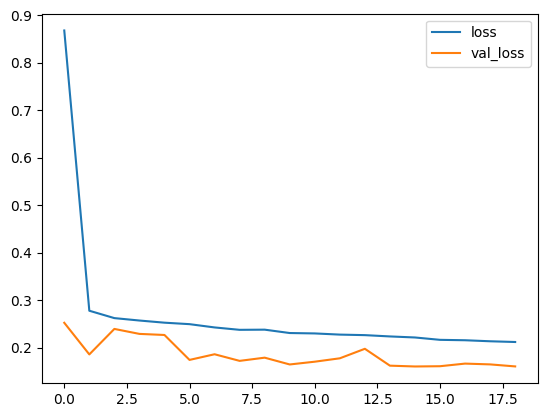

435/435 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
1303/1303 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,0.3,0.16,0.4,0.084,0.082,0.69,0.7


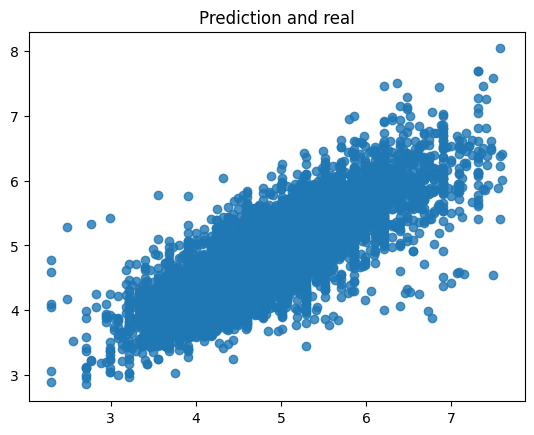

C:\Users\rocks\AppData\Local\Temp\ipykernel_20708\4124505080.py:31: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




MemoryError: Unable to allocate 1.44 GiB for an array with shape (193098816,) and data type int64

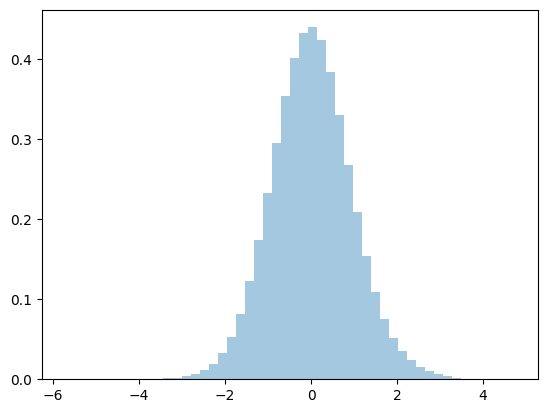

In [44]:
nn_model1 = Sequential()


es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)


nn_model1.add(Dense(64, activation = 'relu'))
nn_model1.add(Dropout(0.1))
nn_model1.add(Dense(1))

nn_model1.compile(
    optimizer='rmsprop',
    loss='mse'
)

nn_model1.fit(
    x = X_train_sc,
    y = y_train,
    epochs = 100,
    validation_data=(X_test_sc, y_test), 
    batch_size = 128,
    callbacks=[es]
)


pd.DataFrame(nn_model1.history.history).plot()
plt.show()

analysis(model = nn_model1, 
         X_train = X_train_sc, 
         X_test = X_test_sc, 
         y_train = y_train, 
         y_test = y_test)

********************
### Model comparison
Model Comparison

I evaluated four different algorithms to compare their performance on the dataset. The accuracy scores for each model are summarized below:

|Models|Accuray Score|
|-|-|
|Linear Regression|0.68|
|Random Forest Regression|0.73|
|Gradient Boosting Regressor|0.68|
|Dense Neural Networks|0.69|

Among these, **Random Forest Regressor** achieved the highest accuracy score (0.73), making it the most suitable choice for this problem. Therefore, we proceed with Random Forest Regressor for further tuning and optimization.
********************************

### Using text data from 'description' column

In [46]:
df_train['description']

17236    Enjoy a beautiful contemporary residence with ...
58369    My place is close to Don Antonio's, Metro Expo...
44240    Stay one block from Wrigley Field! This renova...
57759    This room is in the lower level of Fort Washin...
40254    Welcome to your home away from home! Cozy priv...
                               ...                        
34345    Nestled under a canopy of oak trees, this 1920...
58878    Our comfortable 2 bedroom apt, centrally locat...
50162        Our lovely apartment has high ceilings and...
49893    Spacious, clean, and flooded with sunlight: Pe...
68913    A simple and sensible apartment ideal for thos...
Name: description, Length: 41686, dtype: object

In [48]:
import nltk
nltk.download('stopwords')

def del_punct(text):
    chars = [char for char in text if char not in string.punctuation]
    return ''.join(chars)

def del_stopwords(text):
    words = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return words

def text_preparation(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'\d+', 'somenumbers', text)
    text = del_stopwords(del_punct(text))
    return text
    
    
text_preparation('Enjoy a beautiful 67 contemporary residence with')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rocks\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['enjoy', 'beautiful', 'somenumbers', 'contemporary', 'residence']

In [ ]:
bow_transformer = CountVectorizer(analyzer = text_preparation, max_features = 1500).fit(df_train['description'])
bow = bow_transformer.transform(df_train['description'])
bow.shape

### tf-idf transformer
Transform a count matrix to a normalized tf or tf-idf representation. Tf means term-frequency while tf-idf means term-frequency times inverse document-frequency.

In [ ]:
tfidf_transformer = TfidfTransformer().fit(bow)
train_tfidf = tfidf_transformer.transform(bow)

bow_test = bow_transformer.transform(df_test['description'])
test_tfidf = tfidf_transformer.transform(bow_test)

**Applying the tf-idf transformer on the Random forest regressor**

In [ ]:
rfm_text = RandomForestRegressor(
    max_depth = 10, 
    n_estimators = 500,
    n_jobs = -1, 
    random_state = 101
)
rfm_text.fit(train_tfidf, df_train['log_price'])

comment = ''

analysis(
    model = rfm_text, 
    X_train = train_tfidf, 
    X_test = test_tfidf, 
    y_train = df_train['log_price'], 
    y_test = df_test['log_price']
)

****************
### Applying Stacked Regression
Stacking Regressions is a method for forming linear combinations of different predictors to give improved prediction accuracy. The idea is to use cross-validation data and least squares under non-negativity contraints to determine the coefficients in the combination.

In [ ]:
class StackRegression:
    
    def __init__(self, model_general, model_secondary):
        self.model_general = model_general
        self.model_secondary = model_secondary
    
    def fit_predict(self, X_train_general, X_train_secondary, y_train, X_test_general, X_test_secondary, y_test):
        self.model_secondary.fit(X_train_secondary, y_train)
        
        self.secondary_predictions_test =  self.model_secondary.predict(X_test_secondary)
        self.secondary_predictions_train =  self.model_secondary.predict(X_train_secondary)
        
        self.X_train_full = X_train_general.copy()
        self.X_train_full.assign(secondary_model_predictions = self.secondary_predictions_train)
        
        self.X_test_full = X_test_general.copy()
        self.X_test_full.assign(secondary_model_predictions = self.secondary_predictions_test)
                        
        self.model_general.fit(self.X_train_full, y_train)
        
        return self.model_general.predict(self.X_test_full)

In [ ]:
model_general = RandomForestRegressor(
          max_depth = 10,
          n_jobs = -1, 
          random_state = 101,
          n_estimators = 700
    
)

model_for_text = RandomForestRegressor(
          max_depth = 10,
          n_jobs = -1, 
          random_state = 101,
          n_estimators = 700
    
)

stack_model = StackRegression(model_general, model_for_text)


prediction_test = stack_model.fit_predict(
    X_train_general = df_d.drop('log_price', axis = 1), 
    X_train_secondary = train_tfidf, 
    y_train = df_d['log_price'], 
    X_test_general = test.drop('log_price', axis = 1), 
    X_test_secondary = test_tfidf, 
    y_test = test['log_price']
)

prediction_train = stack_model.fit_predict(
    X_train_general = df_d.drop('log_price', axis = 1), 
    X_train_secondary = train_tfidf, 
    y_train = df_d['log_price'], 
    X_test_general = df_d.drop('log_price', axis = 1), 
    X_test_secondary = train_tfidf, 
    y_test = df_d['log_price']
)

show_metrics(prediction_test, prediction_train, y_test = test['log_price'], y_train = df_d['log_price'])


sns.regplot(x = test['log_price'], y = prediction_test, fit_reg=False)
plt.title('Prediction and real')
plt.show()

sns.distplot(test['log_price'] - prediction_test, bins = 50)
plt.title('Error variance')
plt.show()

### Validation Process

In [ ]:
val_data_for_model = columns_standardization(processing(validation_df))
val_data_for_model

In [ ]:
val_data_for_model[val_data_for_model.isnull().any(axis=1)]

### Final Model Deployment

In [ ]:
analysis(
    model = rfm, 
    X_train = df_d.drop('log_price', axis = 1), 
    X_test = val_data_for_model.drop('log_price', axis = 1), 
    y_train = df_d['log_price'], 
    y_test = val_data_for_model['log_price']
)